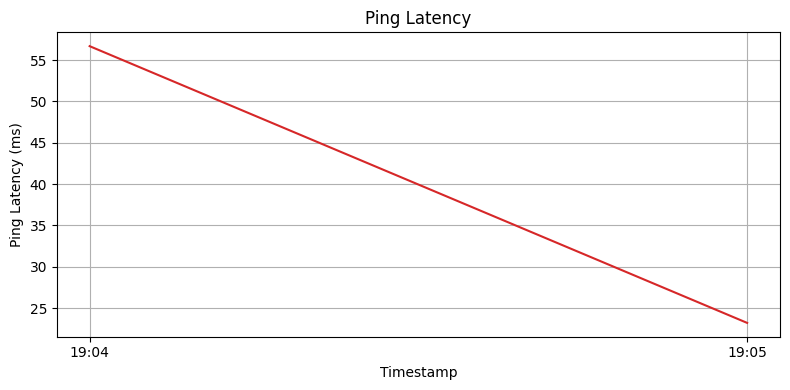

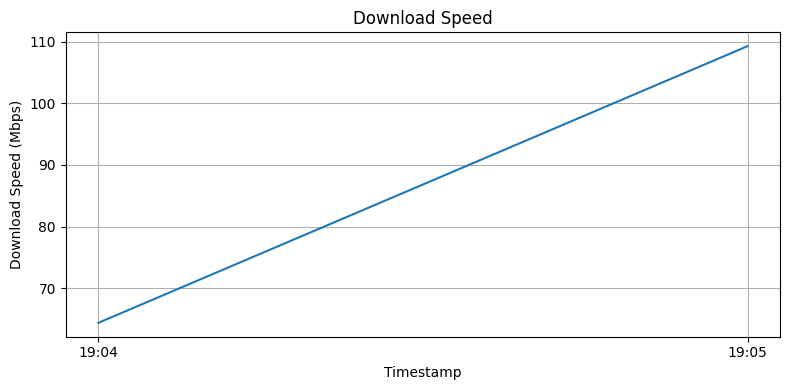

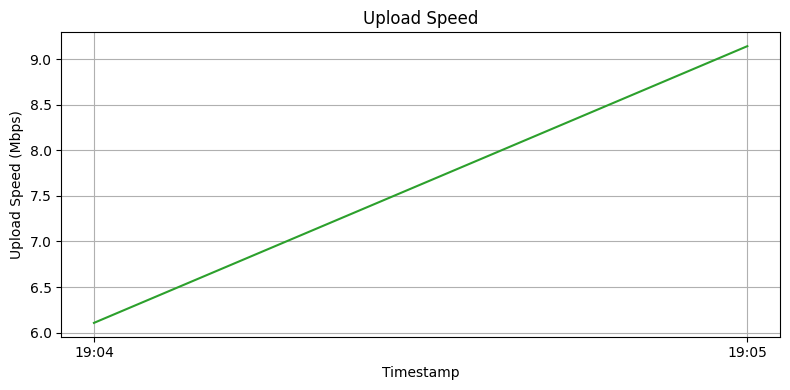

In [13]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone

# JSONデータを読み込む
with open('speedtest.json') as f:
    data = json.load(f)

# タイムゾーンを東京に設定
jst = timezone('Asia/Tokyo')

# タイムスタンプ、ping、download、uploadのデータを抽出
timestamps = []
ping_latencies = []
download_speeds = []
upload_speeds = []

for result in data:
    timestamp = datetime.fromisoformat(result['timestamp'].replace('Z', '+00:00')).astimezone(jst)
    timestamps.append(timestamp.strftime('%H:%M'))  # 時刻のみを抽出
    ping_latencies.append(result['ping']['latency'])
    download_speeds.append(result['download']['bandwidth'] / 125000)  # Mbpsに変換
    upload_speeds.append(result['upload']['bandwidth'] / 125000)  # Mbpsに変換
# pingのグラフをプロット
plt.figure(figsize=(8, 4))
plt.plot(timestamps, ping_latencies, color='tab:red')
plt.xlabel('Timestamp')
plt.ylabel('Ping Latency (ms)')
plt.title('Ping Latency')
plt.grid(True)
plt.tight_layout()
plt.show()

# download速度のグラフをプロット
plt.figure(figsize=(8, 4))
plt.plot(timestamps, download_speeds, color='tab:blue')
plt.xlabel('Timestamp')
plt.ylabel('Download Speed (Mbps)')
plt.title('Download Speed')
plt.grid(True)
plt.tight_layout()
plt.show()

# upload速度のグラフをプロット
plt.figure(figsize=(8, 4))
plt.plot(timestamps, upload_speeds, color='tab:green')
plt.xlabel('Timestamp')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Upload Speed')
plt.grid(True)
plt.tight_layout()
plt.show()